# Step 1: Import libraries and read data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'C:\Users\Jesse\OneDrive\Jessen kansio\Data_projects\Repository\PortfolioProjects\Movie_Industry\movies.csv')
df_copy = df.copy() # copy of original dataframe

# Step 2: Inspecting the data

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
# Checking for missing data 

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

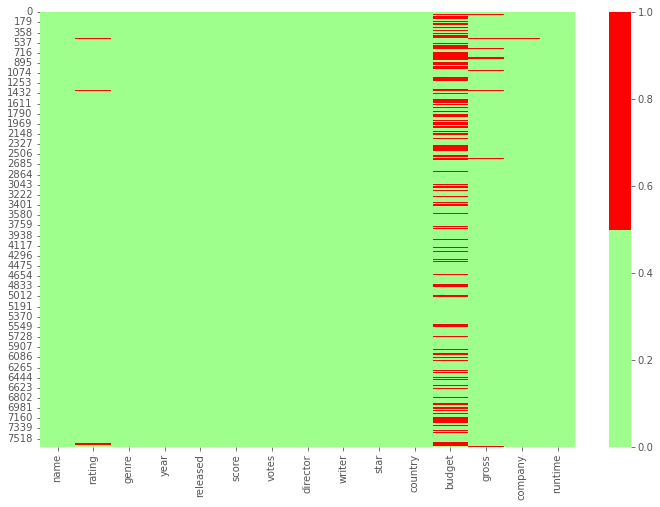

In [7]:
# Visualizing missing data

cols = df.columns[:]
colours = ['#9fff8c', '#fc0303']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
plt.show()

In [8]:
# Missing data percentage 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, (pct_missing)))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


### The amount of missing data in 'rating' and 'gross' is 1% and 2%.
### In other rows it is less than 1% except 'budget' 
### Budget is missing 28% of data

# Step 3: Cleaning data

In [9]:
# Delete all the rows with missing rating, gross, score, votes and runtime
df.dropna(subset=['rating', 'gross', 'score','votes','runtime', ], inplace=True)

# Replacing NaN values with 'N/A where datatype is object'
columns_to_fill = ['released', 'writer', 'country', 'company']
df[columns_to_fill] = df[columns_to_fill].fillna('N/A')

### Visualizing budget data to determine how to handle missing data 

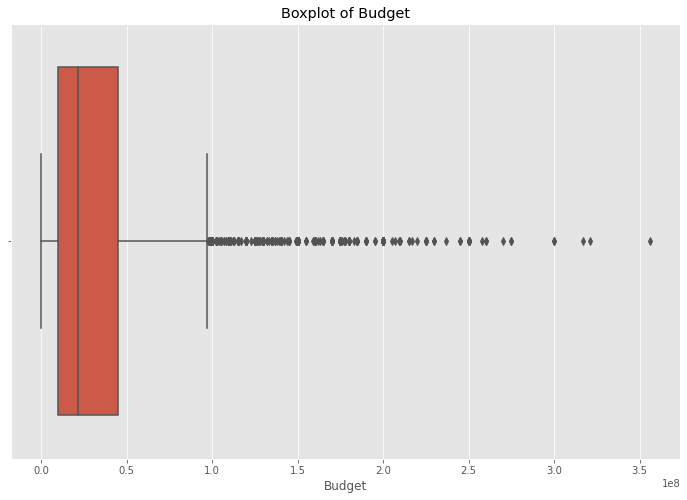

In [10]:
sns.boxplot(x=df['budget'])
plt.xlabel('Budget')
plt.title('Boxplot of Budget')
plt.show()

In [11]:
budget_median = df['budget'].median()
budget_mean = df['budget'].mean()

print("Comparing median and mean values")
print('Median of budget:', budget_median)
print('Mean of budget:', budget_mean)

Comparing median and mean values
Median of budget: 21500000.0
Mean of budget: 35997406.25465609


### Distribution of budget is highly skewed. Replacing NaN values with median instead of mean values


In [12]:
budget_median = df['budget'].median()
df['budget'].fillna(budget_median, inplace=True)

### Changing data type of columns

In [13]:

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [14]:
# 'released' column's values are in string format and they contain unneeded information e.g (country_name). 
# 'year' column has incorrect values 
# --> create new column ('yearcorrect') with corrected year which is extracted from 'released' column:

df['released'] = df['released'].str.replace(r'\s+\(.*\)', '') # replace country with empty string and leave date 
df['yearcorrect'] = df['released'].astype(str).str[-4:] # extract the year from a string
df['yearcorrect'] = df['yearcorrect'].astype('int64') # change datatype to int

C:\Users\Jesse\AppData\Local\Temp/ipykernel_15684/3669520005.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['released'] = df['released'].str.replace(r'\s+\(.*\)', '') # replace country with empty string and leave date


### Sort  values by gross earnings and drop dublicates

In [15]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998",6.1,2900,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,21500000,1672,Polygram Filmed Entertainment,87,1998
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996",7.4,37000,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,21500000,1605,Balboa Entertainment,110,1996
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,21500000,1400,British Broadcasting Corporation (BBC),103,2001
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020",5.2,735,John Swab,John Swab,Ron Perlman,United States,21500000,682,Roxwell Films,93,2020


In [16]:
# Drop any duplicates

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020",6.8,3700,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149,2020
7653,The Quarry,R,Crime,2020,"April 17, 2020",5.4,2400,Scott Teems,Scott Teems,Shea Whigham,United States,21500000,3661,Prowess Pictures,98,2020
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020",6.6,1300,Teng Cheng,N/A,Guangtao Jiang,China,21500000,240663149,Beijing Enlight Pictures,110,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020",5.0,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,21500000,413378,Pryor Entertainment,120,2020


# Step 4: Finding correlations in data

In [17]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.095255,0.219095,0.290771,0.259164,0.114857,0.997554
score,0.095255,1.000000,0.415240,0.059471,0.188295,0.397530,0.102615
votes,0.219095,0.415240,1.000000,0.455981,0.631118,0.310219,0.214698
budget,0.290771,0.059471,0.455981,1.000000,0.744749,0.273678,0.283066
gross,0.259164,0.188295,0.631118,0.744749,1.000000,0.245394,0.252219
runtime,0.114857,0.397530,0.310219,0.273678,0.245394,1.000000,0.114548
yearcorrect,0.997554,0.102615,0.214698,0.283066,0.252219,0.114548,1.000000


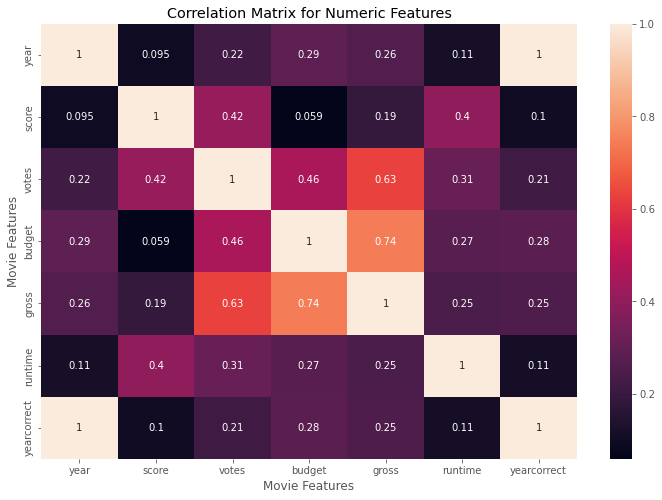

In [18]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

### Visualizing correlation between budget and gross

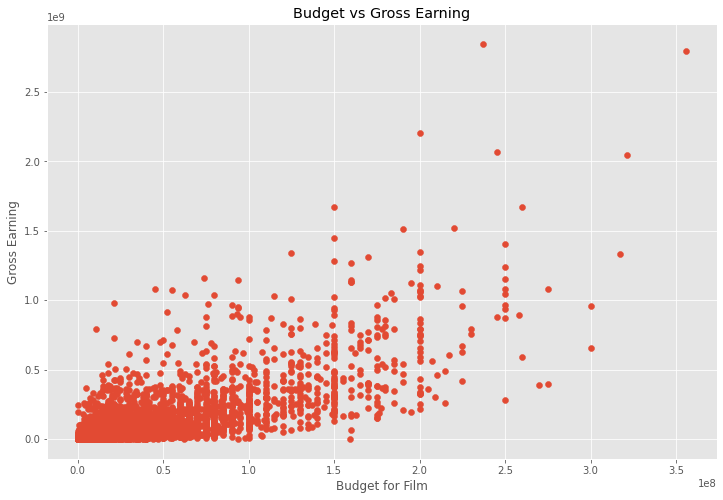

In [19]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earning')

plt.show()

### Plot budget vs gross and highlight top 5 highest gross earning movies


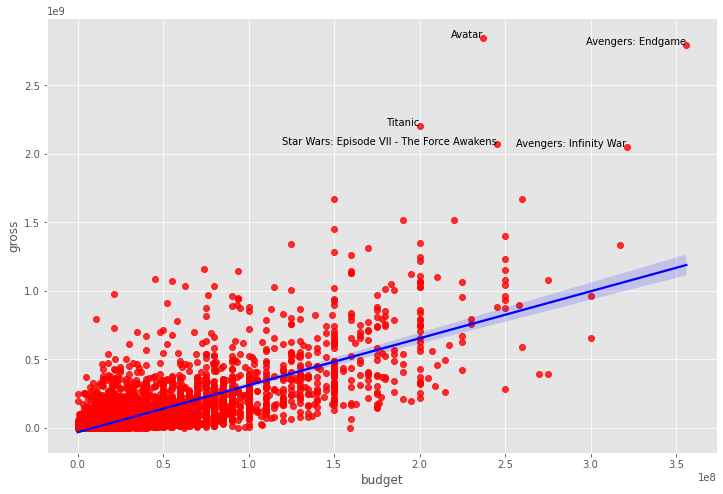

In [20]:
sorted_data = df.sort_values(by='gross', ascending=False)
top_movies = sorted_data.head(5)
ax = sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

for i, movie in top_movies.iterrows():
    ax.text(movie['budget'], movie['gross'], movie['name'], horizontalalignment='right', size='medium')
plt.show()

# Converting object datatypes into numeric

In [21]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes  

### Compare converted dataframe to original

In [22]:
df_numerized.head() # converted data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6382,6,6,1980,1474,8.4,927000,2476,3858,982,52,19000000,46998772,2183,146,1980
1,5382,6,1,1980,1278,5.8,65000,2173,1566,306,53,4500000,58853106,689,104,1980
2,4963,4,0,1980,1531,8.7,1200000,1064,2467,1646,53,18000000,538375067,1449,124,1980
3,278,4,4,1980,1278,7.7,221000,1250,1922,2116,53,3500000,83453539,1701,88,1980
4,994,6,4,1980,1326,7.3,108000,1011,501,387,53,6000000,39846344,1669,98,1980


In [23]:
df.head() #original data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6382,6,6,1980,1474,8.4,927000,2476,3858,982,52,19000000,46998772,2183,146,1980
1,5382,6,1,1980,1278,5.8,65000,2173,1566,306,53,4500000,58853106,689,104,1980
2,4963,4,0,1980,1531,8.7,1200000,1064,2467,1646,53,18000000,538375067,1449,124,1980
3,278,4,4,1980,1278,7.7,221000,1250,1922,2116,53,3500000,83453539,1701,88,1980
4,994,6,4,1980,1326,7.3,108000,1011,501,387,53,6000000,39846344,1669,98,1980


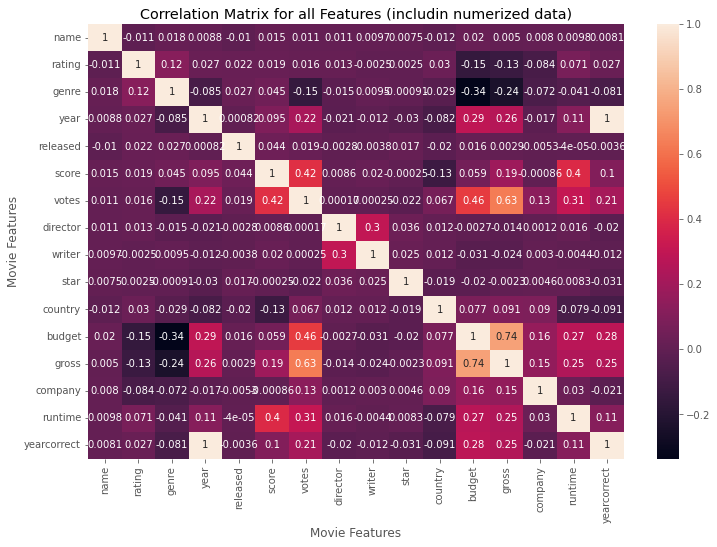

In [24]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for all Features (includin numerized data)')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [25]:
corr_matrix = df_numerized.corr()
corr_pairs = corr_matrix.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.011268
      genre       0.017938
      year        0.008842
      released   -0.010277
dtype: float64

In [26]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

genre   budget   -0.336870
budget  genre    -0.336870
genre   gross    -0.242625
gross   genre    -0.242625
rating  budget   -0.149141
dtype: float64

In [27]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr.head(10)

votes        gross          0.631118
gross        votes          0.631118
             budget         0.744749
budget       gross          0.744749
yearcorrect  year           0.997554
year         yearcorrect    0.997554
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
dtype: float64

### Budget and votes have the highest correlation to gross earning
### Movie company has low correlation to gross earning